# THIS FILE IS IN THE HANDOUTS FOLDER. COPY IT INTO YOUR CLASS NOTES TO WORK ON TODAY

- [**Read the chapter on the website!**](https://ledatascifi.github.io/ledatascifi-2024/content/05/02_reg.html) It contains a lot of extra information we won't cover in class extensively.
- After reading that, I recommend [this webpage as a complimentary place to get additional intuition.](https://aeturrell.github.io/coding-for-economists/econmt-regression.html)

## ASAP

Declare your team and project interests in the project sheet



# Today: Regression

We start our machine learning applications with regression for a few simple reasons:
- Regression is fundamental method for estimating the relationship between a variable ("y") that condition on many ("X") variables. 
- But the coefficients obtained can also be used to generate predictions. 
- _Note: The focus in this section is on RELATIONSHIP paradigm_
- Many issues that confront researchers have well understood solutions when regression is the model being used. 
- Regression coefficients are easy to interpret.
- https://twitter.com/seanjtaylor/status/1550326602105466880


  
## Objectives

1. You can fit a regression with `statsmodels` or `sklearn`
    - statsmodels: Nicer result tables, usually easier to specifying the regression model
    - sklearn: Easier to use within a prediction/ML exercise
2. You can view the results visually or numerically of your model with either method
3. The focus today is on the _mechanics_ of running regressions, viewing the output, and using the estimation's output objects.

![](https://media.giphy.com/media/yoJC2K6rCzwNY2EngA/giphy.gif)


In [1]:
# %matplotlib notebook  

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols as sm_ols


## Data

First, we load the data. 

**This is a new dataset, so we should do some data exploration!** Things students should try:
- describe() - any impossible values
- value_count() any categorical variables
- didn't we have a community function to start the EDA?
- correlation heat map
- look for outliers for all variables, and within pairplots
- print out and explore many sections of the data manually (in Excel or Spyder) to get familiar and check for data consistency issues


In [2]:
url = 'https://github.com/LeDataSciFi/data/raw/main/Fannie%20Mae/Fannie_Mae_Plus_Data.gzip?raw=true'
fannie_mae = pd.read_csv(url,compression='gzip') 

## Task 1

Spend 5 minutes exploring the data and jot down what you learn about the data. 


In [3]:
# pip install -U ydata-profiling
# from ydata_profiling import ProfileReport

# create the report:
# profile = ProfileReport(fannie_mae, title="Pandas Profiling Report")
# profile.to_file("fannie_mae_summary.html")

################################################################################################
# this file - fannie_mae_summary.html - is in the data repo, and in the class handouts folder  #
################################################################################################

# NOW GO AND SPEND TIME WITH THIS!

# # OBS, # VARS.
# OBSERVATION UNIT? (A SINGLE LOAN)
# DUPLICATE OBSERVATIONS (YES, JUDGING BY LOAN_IDENTIFIER!)
# WHICH VARS ARE #S? WHICH ARE CATEGORICAL AND WHAT VALUES DO THEY TAKE?

### Info about the dataset

- A dataset about loans
    - **loan ID is the unit of observation**
    - but loan ID is not unique
    - EXPLORE THIS!
- 36 variables. Look for:
    - Missing values, crazy values, approporatie format (are #s #s)
    - What's categorial, whats a int/float
    - String variables: What are they (categorical?)
- 135k rows
- Variable notes - go one by one through them! Some things we found quickly:
  - a lot of vars have nans,
  - 2 credit score vars? Borrower_Credit_Score_at_Origination Co-borrower_credit_score_at_origination
  - categorical vars include; Occupancy_type, Number_of_units, Original_Loan_Term, 
  - Seller_Name has 94 banks 

In [4]:
slice = fannie_mae.head(300) # look at with var inspector 
fannie_mae.head().T # ABCD!

,0,1,2,3,4
Loan_Identifier,973373000000.0,927620000000.0,717667000000.0,988951000000.0,190885000000.0
Origination_Channel,B,B,B,C,R
Seller_Name,OTHER,"PNC BANK, N.A.",OTHER,AMTRUST BANK,OTHER
Original_Interest_Rate,6.875,5.875,6.25,6.0,5.875
Original_UPB,32000.0,200000.0,122000.0,67000.0,50000.0
Original_Loan_Term,360.0,360.0,180.0,180.0,180.0
Original_LTV_(OLTV),90.0,80.0,80.0,77.0,41.0
Original_Combined_LTV_(CLTV),90.0,80.0,80.0,77.0,41.0
Number_of_Borrowers,1.0,2.0,2.0,2.0,2.0
Original_Debt_to_Income_Ratio,22.0,26.0,31.0,17.0,10.0


In [5]:
fannie_mae.columns

Index(['Loan_Identifier', 'Origination_Channel', 'Seller_Name',
       'Original_Interest_Rate', 'Original_UPB', 'Original_Loan_Term',
       'Original_LTV_(OLTV)', 'Original_Combined_LTV_(CLTV)',
       'Number_of_Borrowers', 'Original_Debt_to_Income_Ratio',
       'Borrower_Credit_Score_at_Origination', 'Loan_purpose', 'Property_type',
       'Number_of_units', 'Occupancy_type', 'Property_state', 'Zip_code_short',
       'Primary_mortgage_insurance_percent', 'Product_type',
       'Co-borrower_credit_score_at_origination', 'Mortgage_Insurance_type',
       'Origination_Date', 'First_payment_date',
       'First_time_home_buyer_indicator', 'UNRATE', 'CPIAUCSL', 'Qdate',
       'rGDP', 'TCMR', 'POILWTIUSDM', 'TTLCONS', 'DEXUSEU', 'BOPGSTB',
       'GOLDAMGBD228NLBM', 'CSUSHPISA', 'MSPUS'],
      dtype='object')

In [6]:
# looks like loan ID is the unit of observation, but it's not unique
len(fannie_mae) - len(fannie_mae['Loan_Identifier'].drop_duplicates())

9675

In [7]:
fannie_mae.shape

(135038, 36)

In [8]:
fannie_mae['Number_of_units'].value_counts()

Number_of_units
1.0    131633
2.0      2504
3.0       477
4.0       424
Name: count, dtype: int64

In [9]:
fannie_mae['Occupancy_type'].value_counts() 

Occupancy_type
P    120399
I      9238
S      5401
Name: count, dtype: int64

In [10]:
fannie_mae['Original_Loan_Term'].value_counts()

Original_Loan_Term
360.0    93557
180.0    29335
240.0     6223
120.0     3993
300.0      986
         ...  
192.0        1
106.0        1
166.0        1
259.0        1
321.0        1
Name: count, Length: 127, dtype: int64

In [11]:
fannie_mae[['Original_LTV_(OLTV)', 'Original_Combined_LTV_(CLTV)']].corr()

,Original_LTV_(OLTV),Original_Combined_LTV_(CLTV)
Original_LTV_(OLTV),1.000000,0.975036
Original_Combined_LTV_(CLTV),0.975036,1.000000


In [12]:
fannie_mae[['Borrower_Credit_Score_at_Origination','Co-borrower_credit_score_at_origination']].describe()

,Borrower_Credit_Score_at_Origination,Co-borrower_credit_score_at_origination
count,134481.000000,67366.000000
mean,742.428797,751.145904
std,53.428076,50.576226
min,361.000000,400.000000
25%,707.000000,721.000000
50%,755.000000,765.000000
75%,786.000000,791.000000
max,850.000000,850.000000


### Time of sample

The evolution of interest rates over the period:

## Clean the data and create variables we will use

These variables are pretty straightforward:

In [13]:
fannie_mae = (fannie_mae
                  # create variables
                  .assign(l_credscore = np.log(fannie_mae['Borrower_Credit_Score_at_Origination']),
                          l_LTV = np.log(fannie_mae['Original_LTV_(OLTV)']),
                          Origination_Date = lambda x: pd.to_datetime(x['Origination_Date']),
                          Origination_Year = lambda x: x['Origination_Date'].dt.year,
                          const = 1,
                          great = fannie_mae['Borrower_Credit_Score_at_Origination'] >= 800
                         )
              
             )

<Axes: xlabel='Origination_Year', ylabel='Original_Interest_Rate'>

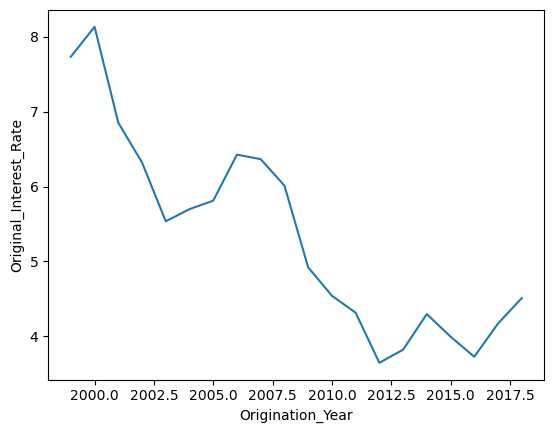

In [14]:
sns.lineplot(x='Origination_Year',y='Original_Interest_Rate',
            data=fannie_mae.groupby('Origination_Year')['Original_Interest_Rate'].mean().reset_index()
            )


Credit rating is a number between 0 and 850. But in some analysis, it might make sense to have categories of credit ratings (e.g. bad to good). I borrowed [these cutoffs from experian.](https://www.experian.com/blogs/ask-experian/infographic-what-are-the-different-scoring-ranges/)

In [15]:
# create a categorical bin var with "pd.cut()"

fannie_mae['creditbins']= pd.cut(fannie_mae['Borrower_Credit_Score_at_Origination'],
                                 [0,579,669,739,799,850],
                                 labels=['Very Poor','Fair','Good','Very Good','Exceptional'])

Here is the variable that created. I notice that 669 (right on the threshold of a bin) goes into the "Fair" bin instead of "Good".

In [16]:
fannie_mae.loc[:5,['Borrower_Credit_Score_at_Origination','creditbins']]

,Borrower_Credit_Score_at_Origination,creditbins
0,669.0,Fair
1,693.0,Good
2,741.0,Very Good
3,804.0,Exceptional
4,658.0,Fair
5,665.0,Fair


In [17]:
# pd.cut took credit , var number between 0 and 850,
# and changed it to bins. I labeled the bins explicitly

fannie_mae['creditbins'].value_counts(dropna=False)

creditbins
Very Good      63855
Good           39539
Exceptional    15889
Fair           14560
Very Poor        638
NaN              557
Name: count, dtype: int64

In [18]:
fannie_mae['creditbins'].value_counts(dropna=False)/len(fannie_mae)

creditbins
Very Good      0.472867
Good           0.292799
Exceptional    0.117663
Fair           0.107822
Very Poor      0.004725
NaN            0.004125
Name: count, dtype: float64

## Exercises with statsmodels

- **For all problems: y is the interest rate of the loan**
- I recommend the _statsmodels formula_ method on the website

Psuedocode for using statsmodels to run a regression:
```python
model = sm_ols(<formula>, data=<dataframe>)
result=model.fit()

# to print regression output: result.summary()
# get predicted values (yhat): result.predict
# get regression residuals (uhat): result.resid
```

### Q1: Starter regressions

A. Regress y on the credit score (student demo): $y=\beta_0 + \beta_1*\text{Credit Score}$
- _I'll show 2 ways: the psuedo code and the one-liner_

B. Regress y on the **natural log** of the credit score: $y=\beta_0 + \beta_1*log(\text{Credit Score})$
- _I'll show two ways to do this_

C. Regress y on the **natural log** of the loan-to-value

D. Regress y on the natural log of the loan-to-value and the natural log of the credit score: $y=\beta_0 + \beta_1*log(\text{LTV}) + \beta_2*log(\text{Credit Score})$

In [19]:
# PROB 1.A
# opt A - declare model, save results, use results
model = sm_ols(
    "Original_Interest_Rate ~ Borrower_Credit_Score_at_Origination", data=fannie_mae
)
results = model.fit()
results.summary()

# opt B - don't save model or results,... just print
sm_ols("Original_Interest_Rate ~ Borrower_Credit_Score_at_Origination", 
       data=fannie_mae).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Original_Interest_Rate   R-squared:                       0.126
Model:                                OLS   Adj. R-squared:                  0.126
Method:                     Least Squares   F-statistic:                 1.938e+04
Date:                    Wed, 20 Mar 2024   Prob (F-statistic):               0.00
Time:                            13:42:35   Log-Likelihood:            -2.1575e+05
No. Observations:                  134481   AIC:                         4.315e+05
Df Residuals:                      134479   BIC:                         4.315e+05
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               11.5819      0.046    253.270      0.000      11.492      11.671
Borrower_Credit_Score_at_Origination    -0.0086   6.14e-05   -139.198      0.000      -0.009      -0.008
==============================================================================
Omnibus:                     2660.479   Durbin-Watson:                   0.397
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2660.737
Skew:                           0.321   Prob(JB):                         0.00
Kurtosis:                       2.750   Cond. No.                     1.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
# PROB 1.B
# reg on log cred score
# opt 1: create the variable ahead of time and use it
sm_ols("Original_Interest_Rate ~ l_credscore", 
       data=fannie_mae).fit().summary()

# opt 2: sm_ols formula lets you use math functions inside it (numpy or base python)
sm_ols("Original_Interest_Rate ~ np.log(Borrower_Credit_Score_at_Origination)", 
       data=fannie_mae).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Original_Interest_Rate   R-squared:                       0.124
Model:                                OLS   Adj. R-squared:                  0.124
Method:                     Least Squares   F-statistic:                 1.906e+04
Date:                    Wed, 20 Mar 2024   Prob (F-statistic):               0.00
Time:                            13:42:35   Log-Likelihood:            -2.1589e+05
No. Observations:                  134481   AIC:                         4.318e+05
Df Residuals:                      134479   BIC:                         4.318e+05
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       45.3715      0.291    156.057      0.000      44.802      45.941
np.log(Borrower_Credit_Score_at_Origination)    -6.0750      0.044   -138.067      0.000      -6.161      -5.989
==============================================================================
Omnibus:                     2741.277   Durbin-Watson:                   0.394
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2737.156
Skew:                           0.325   Prob(JB):                         0.00
Kurtosis:                       2.744   Cond. No.                         598.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# PROB 1.C
# reg on log loan to value
# opt 1: create the variable ahead of time and use it
sm_ols("Original_Interest_Rate ~ l_LTV", 
       data=fannie_mae).fit().summary()

# opt 2 - use numpy log math fcn again, BUT: Original_LTV_(OLTV) has ()
# Q("<bad name>") tells SM_OLS the name is inside the quotes 
sm_ols('Original_Interest_Rate ~ np.log(Q("Original_LTV_(OLTV)"))', 
       data=fannie_mae).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Original_Interest_Rate   R-squared:                       0.007
Model:                                OLS   Adj. R-squared:                  0.007
Method:                     Least Squares   F-statistic:                     1010.
Date:                    Wed, 20 Mar 2024   Prob (F-statistic):          8.41e-221
Time:                            13:42:35   Log-Likelihood:            -2.2548e+05
No. Observations:                  135038   AIC:                         4.510e+05
Df Residuals:                      135036   BIC:                         4.510e+05
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            3.7603      0.047     80.622      0.000       3.669       3.852
np.log(Q("Original_LTV_(OLTV)"))     0.3513      0.011     31.779      0.000       0.330       0.373
==============================================================================
Omnibus:                     4889.290   Durbin-Watson:                   0.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3115.913
Skew:                           0.245   Prob(JB):                         0.00
Kurtosis:                       2.439   Cond. No.                         59.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# PROB 1.D
# adding more variables is easy! +X2
sm_ols('Original_Interest_Rate ~ l_LTV + l_credscore',
       data=fannie_mae).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Original_Interest_Rate   R-squared:                       0.126
Model:                                OLS   Adj. R-squared:                  0.126
Method:                     Least Squares   F-statistic:                     9656.
Date:                    Wed, 20 Mar 2024   Prob (F-statistic):               0.00
Time:                            13:42:35   Log-Likelihood:            -2.1578e+05
No. Observations:                  134481   AIC:                         4.316e+05
Df Residuals:                      134478   BIC:                         4.316e+05
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      44.1324      0.302    145.949      0.000      43.540      44.725
l_LTV           0.1546      0.010     14.765      0.000       0.134       0.175
l_credscore    -5.9859      0.044   -134.888      0.000      -6.073      -5.899
==============================================================================
Omnibus:                     2793.369   Durbin-Watson:                   0.386
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2743.990
Skew:                           0.321   Prob(JB):                         0.00
Kurtosis:                       2.720   Cond. No.                         735.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Q2: Best practices: Look at the outputs every time

Let's talk about the outputs you see and should look at EVERY time you run a regression:
- Number of obs - students skip looking at this, NEVER skip!
- R2 
- AR2
- Coef 
- Std error, t value, p value ("P>|t|")
- Std error options:
    - `.fit(cov_type="HC2")`
    - `.fit(cov_type="cluster", cov_kwds={"groups": df["industry"]})`

### Q3: Regressions with transformations

We are talking about "linear regression. What that means is that the model is linear in the regressors: but it doesn’t mean that those regressors can't be some kind of non-linear transform of the original features $x_i$." The most common transformations are logging variables, interaction terms, and polynomial terms."

We already did log transformations above. 

An interaction term simply means one regressor is two variables multiplied:
- $y=\beta_0 + \beta_1 x_1 + \beta_2 x_1 x_2$
- $y=\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 x_2 $

Polynomial terms might look like:
- $y=\beta_0 + \beta_1 x_1 + \beta_2 x_1^2$

A. Regress y on the credit score and the credit score squared. 

B. Regress y on the natural log of the loan-to-value, the natural log of the credit score, and the interaction of LTV and credit score. 



In [23]:
sm_ols('Original_Interest_Rate ~ Borrower_Credit_Score_at_Origination + pow(Borrower_Credit_Score_at_Origination,2)', 
       data=fannie_mae).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Original_Interest_Rate   R-squared:                       0.128
Model:                                OLS   Adj. R-squared:                  0.128
Method:                     Least Squares   F-statistic:                     9880.
Date:                    Wed, 20 Mar 2024   Prob (F-statistic):               0.00
Time:                            13:42:36   Log-Likelihood:            -2.1558e+05
No. Observations:                  134481   AIC:                         4.312e+05
Df Residuals:                      134478   BIC:                         4.312e+05
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        2.8016      0.481      5.822      0.000       1.858       3.745
Borrower_Credit_Score_at_Origination             0.0160      0.001     11.930      0.000       0.013       0.019
pow(Borrower_Credit_Score_at_Origination, 2) -1.704e-05    9.3e-07    -18.329      0.000   -1.89e-05   -1.52e-05
==============================================================================
Omnibus:                     2433.505   Durbin-Watson:                   0.399
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2428.353
Skew:                           0.306   Prob(JB):                         0.00
Kurtosis:                       2.759   Cond. No.                     8.21e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.21e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# PROB 3.B
# three equiv ways to do 3.B

# * automatically includes BOTH vars alone, and the multiplication of them
# v1*v2 is equiv to v1 + v2 + v1:v2
sm_ols('Original_Interest_Rate ~ l_LTV * l_credscore',
       data=fannie_mae).fit().summary()

# you can just manually list them, too, and : multiplies two vars without the expansion
sm_ols('Original_Interest_Rate ~ l_LTV + l_LTV : l_credscore',
       data=fannie_mae).fit().summary()

# you can just manually list them, too, and * multiplies two vars with the expansion but SM drops the extraneous terms
sm_ols('Original_Interest_Rate ~ l_LTV + l_credscore + l_LTV*l_credscore ', 
       data=fannie_mae).fit().summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Original_Interest_Rate   R-squared:                       0.127
Model:                                OLS   Adj. R-squared:                  0.127
Method:                     Least Squares   F-statistic:                     6521.
Date:                    Wed, 20 Mar 2024   Prob (F-statistic):               0.00
Time:                            13:42:36   Log-Likelihood:            -2.1567e+05
No. Observations:                  134481   AIC:                         4.313e+05
Df Residuals:                      134477   BIC:                         4.314e+05
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -16.8119      4.111     -4.090      0.000     -24.869      -8.755
l_LTV                14.6120      0.973     15.024      0.000      12.706      16.518
l_credscore           3.2155      0.621      5.182      0.000       1.999       4.432
l_LTV:l_credscore    -2.1830      0.147    -14.866      0.000      -2.471      -1.895
==============================================================================
Omnibus:                     2756.628   Durbin-Watson:                   0.389
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2719.875
Skew:                           0.321   Prob(JB):                         0.00
Kurtosis:                       2.727   Cond. No.                     3.77e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Q4: Dummy and categorical variables

A. Regress y on the dummy variable for a great credit score.

B. Regress y on the categorical variable we created for credit bins.

C. (Advanced, optional, after class exercise): High dimensional fixed effects. This basically means "a categorical variable with LOTS of values". [See this discussion.](https://aeturrell.github.io/coding-for-economists/econmt-regression.html#high-dimensional-fixed-effects-aka-absorbing-regression)

In [25]:
# binary/dummy vars with two values (0 and 1) can just be added into the reg

sm_ols('Original_Interest_Rate ~ great',
       data=fannie_mae).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Original_Interest_Rate   R-squared:                       0.050
Model:                                OLS   Adj. R-squared:                  0.050
Method:                     Least Squares   F-statistic:                     7048.
Date:                    Wed, 20 Mar 2024   Prob (F-statistic):               0.00
Time:                            13:42:36   Log-Likelihood:            -2.2255e+05
No. Observations:                  135038   AIC:                         4.451e+05
Df Residuals:                      135036   BIC:                         4.451e+05
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.3433      0.004   1466.712      0.000       5.336       5.350
great[T.True]    -0.8916      0.011    -83.951      0.000      -0.912      -0.871
==============================================================================
Omnibus:                     2948.608   Durbin-Watson:                   0.305
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2309.413
Skew:                           0.239   Prob(JB):                         0.00
Kurtosis:                       2.572   Cond. No.                         3.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# you can add categorical variables into a reg
# you will get one coef for each level of the var, except 1 of the levels

# ALWAYS ALWAYS ALWAYS PUT CATEGORICAL VARS INSIDE C()
# C() prevents cat vars that are numbers from being treated like a number
sm_ols('Original_Interest_Rate ~ C(creditbins)',
       data=fannie_mae).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Original_Interest_Rate   R-squared:                       0.116
Model:                                OLS   Adj. R-squared:                  0.116
Method:                     Least Squares   F-statistic:                     4411.
Date:                    Wed, 20 Mar 2024   Prob (F-statistic):               0.00
Time:                            13:42:36   Log-Likelihood:            -2.1651e+05
No. Observations:                  134481   AIC:                         4.330e+05
Df Residuals:                      134476   BIC:                         4.331e+05
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        6.7172      0.048    140.160      0.000       6.623       6.811
C(creditbins)[T.Fair]           -0.6749      0.049    -13.784      0.000      -0.771      -0.579
C(creditbins)[T.Good]           -1.2020      0.048    -24.881      0.000      -1.297      -1.107
C(creditbins)[T.Very Good]      -1.6642      0.048    -34.552      0.000      -1.759      -1.570
C(creditbins)[T.Exceptional]    -2.2655      0.049    -46.351      0.000      -2.361      -2.170
==============================================================================
Omnibus:                     2410.734   Durbin-Watson:                   0.385
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2345.942
Skew:                           0.294   Prob(JB):                         0.00
Kurtosis:                       2.729   Cond. No.                         37.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Q5: Summarize what you've learned so far

sm_ols formula method has some things to know:
- more variables : x1 + x2 + ...
- log vars or take to power : np.log(x1) + pow(x2,2)
- interact variables : x1*x2
- If the variable names "stink" (spaces or chars): Q("<name here>")
- If using categorical variable: C(<name here>)

In [27]:
# opt A: crd score to the power of 2 inside the function. 
# use pow(), np.squared() or np.power() to create the square
# note: **2 doesn't work :(
sm_ols('Original_Interest_Rate ~ Borrower_Credit_Score_at_Origination + pow(Borrower_Credit_Score_at_Origination,2)',
       data=fannie_mae).fit().summary()

# opt B: create the square term before the regression and give that to the function
fannie_mae['credit_score2'] = fannie_mae['Borrower_Credit_Score_at_Origination']**2

sm_ols('Original_Interest_Rate ~ Borrower_Credit_Score_at_Origination + credit_score2',
       data=fannie_mae).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Original_Interest_Rate   R-squared:                       0.128
Model:                                OLS   Adj. R-squared:                  0.128
Method:                     Least Squares   F-statistic:                     9880.
Date:                    Wed, 20 Mar 2024   Prob (F-statistic):               0.00
Time:                            13:42:37   Log-Likelihood:            -2.1558e+05
No. Observations:                  134481   AIC:                         4.312e+05
Df Residuals:                      134478   BIC:                         4.312e+05
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                2.8016      0.481      5.822      0.000       1.858       3.745
Borrower_Credit_Score_at_Origination     0.0160      0.001     11.930      0.000       0.013       0.019
credit_score2                        -1.704e-05    9.3e-07    -18.329      0.000   -1.89e-05   -1.52e-05
==============================================================================
Omnibus:                     2433.505   Durbin-Watson:                   0.399
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2428.353
Skew:                           0.306   Prob(JB):                         0.00
Kurtosis:                       2.759   Cond. No.                     8.21e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.21e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Q6: Plot the regression

_If time is tight: I'll do it._

Plot 1:
- Plot a scatterplot: Plot as X the credit score variable. As Y, use our y.
- On top of that, lineplots:
    - Rerun Q1a's reg and plot the yhat values. 
    - Let's talk about this.
    - Rerun Q1b's reg and plot the yhat values.
    - Compare to the prior line.
    
Plot 2:
- Plot a scatterplot: Plot as X the credit score variable. As Y, use our y.
- On top of that, lineplots:
    - Rerun Q4b's reg and plot the yhat values, hued by credit bin
  
Plot 3:
- Plot a scatterplot: Plot as X the credit score variable. As Y, use our y.
- On top of that, lineplots:
    - Rerun Q4b's reg BUT WITH credit score as a variable and plot the yhat values, hued by credit bin  
    
_Note: statsmodels has some useful plotting functions. My favs are influence_plot (can be slow) and plot_partregress_grid._

<Axes: xlabel='Borrower_Credit_Score_at_Origination', ylabel='Original_Interest_Rate'>

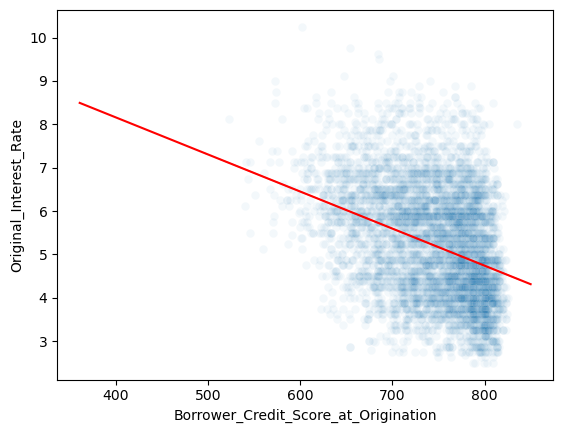

In [28]:
# plot 1

# a normal scatterplot
sns.scatterplot(x='Borrower_Credit_Score_at_Origination',
                y='Original_Interest_Rate',
                alpha = .05,
                data=fannie_mae.sample(5000,random_state=20)) # sampled just to avoid overplotting

# get the predicted y values (yhat) 
# .fit().predict() predicts yhats after fitting the regression
yhat_reg1 = sm_ols('Original_Interest_Rate ~  Borrower_Credit_Score_at_Origination ',  
               data=fannie_mae).fit().predict()

yhat_reg2 = sm_ols('Original_Interest_Rate ~  l_credscore ',  
               data=fannie_mae).fit().predict()


# there is ONE issue with plotting this: the predictions can only be made for 
# obs with a non-missing value for all the Xs in the reg!
# print('len yhat:',len(yhat_reg1), '   len fannie:',len(fannie_mae))

# so if you plot x=cred score, y=yhat, the vectors won't line up
# the trick is to drop missing values in the X vector:

sns.lineplot(x=fannie_mae['Borrower_Credit_Score_at_Origination'].dropna(),
             y=yhat_reg1,color='red')

<Axes: xlabel='Borrower_Credit_Score_at_Origination'>

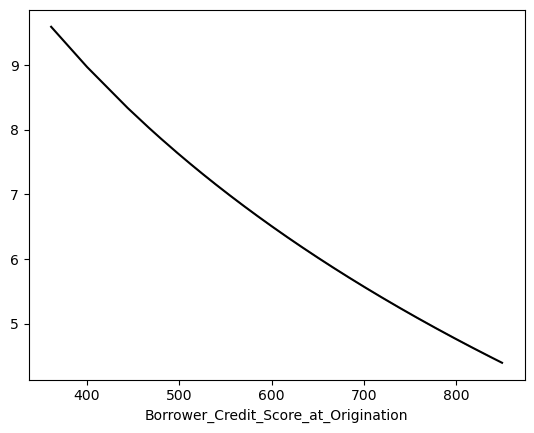

In [29]:
sns.lineplot(x=fannie_mae['Borrower_Credit_Score_at_Origination'].dropna(),
             y=yhat_reg2,color='black')

<Axes: xlabel='Borrower_Credit_Score_at_Origination', ylabel='Original_Interest_Rate'>

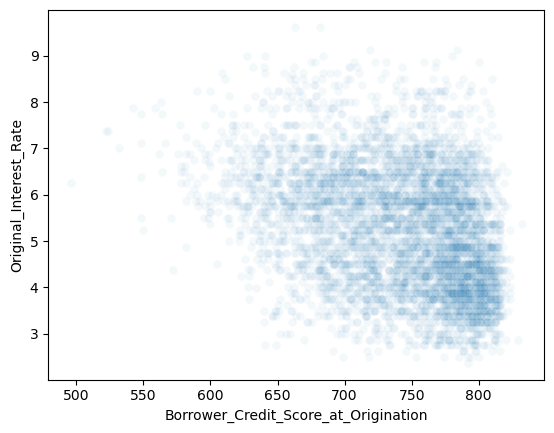

In [30]:
# plot 2

# a df with no missing values for our variables
subset = fannie_mae.dropna(subset=["Original_Interest_Rate", "Borrower_Credit_Score_at_Origination", "creditbins"])

# a normal scatterplot
sns.scatterplot(x='Borrower_Credit_Score_at_Origination',
                y='Original_Interest_Rate',
                alpha = .05,
                data=subset.sample(5000,random_state=20)) # sampled just to avoid overplotting

In [31]:
# get the predicted y values (yhat) 
subset['yhat_reg3'] = sm_ols('Original_Interest_Rate ~  C(creditbins) ', 
                             data=subset).fit().predict()

C:\Users\DonsLaptop\AppData\Local\Temp\ipykernel_6164\3750010045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['yhat_reg3'] = sm_ols('Original_Interest_Rate ~  C(creditbins) ',


<Axes: xlabel='Borrower_Credit_Score_at_Origination', ylabel='yhat_reg3'>

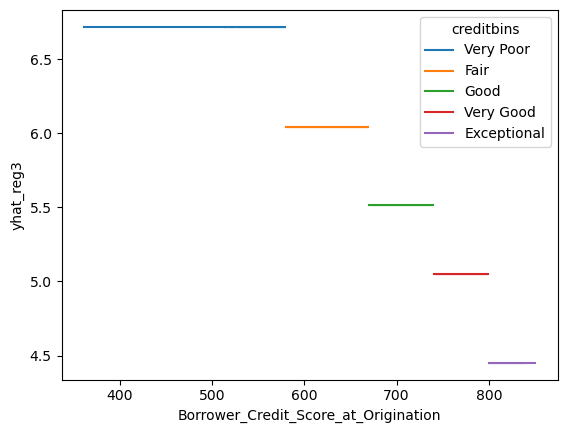

In [32]:
# no missing values to worry about in subset
sns.lineplot(x='Borrower_Credit_Score_at_Origination',y='yhat_reg3',
             data=subset,hue='creditbins')

<Axes: xlabel='Borrower_Credit_Score_at_Origination', ylabel='Original_Interest_Rate'>

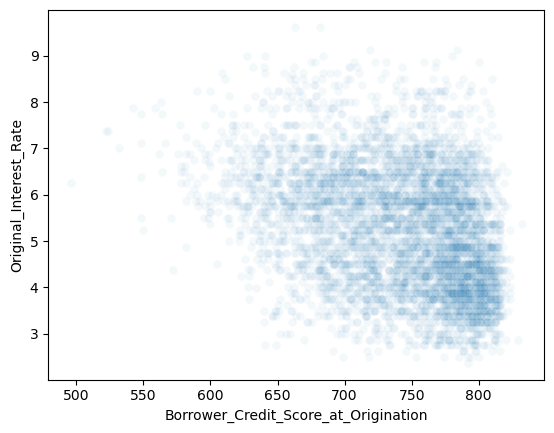

In [33]:
# plot 3

# a df with no missing values for our variables
subset = fannie_mae.dropna(subset=["Original_Interest_Rate", "Borrower_Credit_Score_at_Origination", "creditbins"])

# a normal scatterplot
sns.scatterplot(x='Borrower_Credit_Score_at_Origination',
                y='Original_Interest_Rate',
                alpha = .05,
                data=subset.sample(5000,random_state=20)) # sampled just to avoid overplotting

In [34]:
# get the predicted y values (yhat) 
subset['yhat_reg3'] = sm_ols('Original_Interest_Rate ~  C(creditbins) + Borrower_Credit_Score_at_Origination', 
                             data=subset).fit().predict()

C:\Users\DonsLaptop\AppData\Local\Temp\ipykernel_6164\811998956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['yhat_reg3'] = sm_ols('Original_Interest_Rate ~  C(creditbins) + Borrower_Credit_Score_at_Origination',


<Axes: xlabel='Borrower_Credit_Score_at_Origination', ylabel='yhat_reg3'>

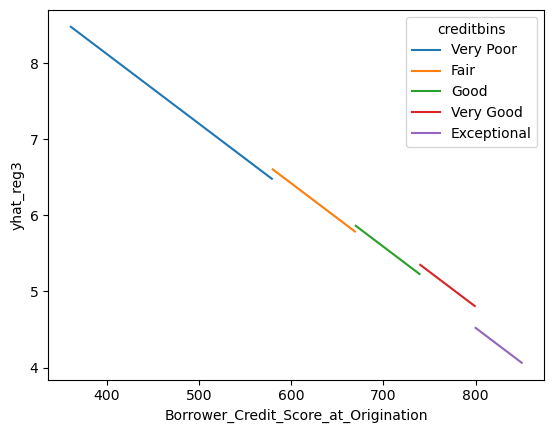

In [35]:
# no missing values to worry about in subset
sns.lineplot(x='Borrower_Credit_Score_at_Origination',y='yhat_reg3',
             data=subset,hue='creditbins')

## Regression with SKLEARN

I don't like running regressions in `sklearn` usually. The main reason to do so is if you're doing a typical ML task that sklearn excels in (meaning: "pipelines", which is a term you'll understand later in the course) or if you know you're going to be using other sklearn models anyways (in which case, you'll already be doing the set up for sklearn).

But I want to run at least one regression in SKLEARN for you so you can see how the mechanics are similar, and how they differ. We will cover sklearn more in future classes.

Psuedocode for a reg in sklearn is similar. The differences:
1. A little more work setting up the data
1. `.fit()` gets the data passed to it 
1. The `results` object is different than statsmodels'

```python

# 1. import the "class" of model form sklearn

from sklearn.linear_model import LinearRegression

# 2. arrange the data - more work than statsmodels

# Issue: sklearn doesn't work with missing values, so drop any obs with missing values
# replace vars_in_your_reg with a list of variables you want to use, including y
subset = df[vars_in_your_reg].dropna()

# explicitly set up the y variable and the X variables you want
y = subset['y'] # whatever the y variable is
X = subset[['X1','X2']] # list the X vars

# 3. set up the model ("instantiate the model")
# every class of models has "hyperparamaters" that control how you want the model to work
# below, fit_intercept=True is a "hyperparameter" for OLS models 
# hyperparameters are the things inside the parenthesis of the model class when you declare it

model = LinearRegression(fit_intercept=True) # true is the default, so this is unneed. if you set this to false, X should include a column of 1s ("const" is the variable I made for this)
result=model.fit(X,y) # in sklearn, you put X and Y inside fit!!!

# the result object is different in sklearn
# results.intercept_ (the constant in the model)
# results.coef_ (the other X vars)

```


## Q7: STUDENT DEMO - regressions **using sklearn**

A. Regress the interest rate on the natural log of the loan-to-value using the sklearn method.

B. Regress the interest rate on the credit score using the sklearn method.

In [36]:
# A
y = fannie_mae['Original_Interest_Rate']   # pick y
X = fannie_mae[['l_LTV']]

model3 = LinearRegression()               # set up the model object (but don't tell sklearn what data it gets!)   
results3 = model3.fit(X,y)                # fit it, and tell it what data to fit on
print('INTERCEPT:', results3.intercept_)  # to get the coefficients, you print out the intercept
print('COEFS:', results3.coef_)           # and the other coefficients separately (yuck)

INTERCEPT: 3.760340891975931
COEFS: [0.3512853]


In [37]:
# B

# # run with this first: won't work! NaN
# y = fannie_mae['Original_Interest_Rate']   # pick y
# X = fannie_mae[['Borrower_Credit_Score_at_Origination']]  

# # then use these X and y (without the restriction to our vars)
# #     this will yield the wrong coefs! (dropna drops a row if ANY var is missing)
# #     but statsmodel only drops rows where vars in the reg are missing
# # so then use these X and y (with restriction)
# #     notice - same coefs!

reg_data = (fannie_mae.copy() # copy to ensure we don't change the orig data
            [['const','Borrower_Credit_Score_at_Origination','Original_Interest_Rate']] 
            .dropna())
y = reg_data['Original_Interest_Rate']   # pick y
X = reg_data[['const','Borrower_Credit_Score_at_Origination']]  

# # copied from webpage direct:
# # NOTICE I EXPLICITLY GIVE X A CONSTANT SO IT FITS AN INTERCEPT

model3 = LinearRegression()               # set up the model object (but don't tell sklearn what data it gets!)   
results3 = model3.fit(X,y)                # fit it, and tell it what data to fit on
print('INTERCEPT:', results3.intercept_)  # to get the coefficients, you print out the intercept
print('COEFS:', results3.coef_)           # and the other coefficients separately (yuck)

INTERCEPT: 11.581857988176289
COEFS: [ 0.         -0.00855164]
